# Project 1: World Progress

<h3 style="color: orange;">Introduction<hr style="color:black;"></h3>

In this project, you'll explore data from [Gapminder.org](http://gapminder.org), a website dedicated to providing a fact-based view of the world and how it has changed. That site includes several data visualizations and presentations, but also publishes the raw data that we will use in this project to recreate and extend some of their most famous visualizations.

The Gapminder website collects data from many sources and compiles them into tables that describe many countries around the world. All of the data they aggregate are published in the [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Their goal is "to compile all public statistics; Social, Economic and Environmental; into a comparable total dataset." All data sets in this project are copied directly from the Systema Globalis without any changes.

This project is dedicated to [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), who championed the use of data to understand and prioritize global development challenges.

<h3 style="color: orange;">Explore the Population Growth Dataset<hr style="color:black;"></h3>

The global population of humans reached 1 billion around 1800, 3 billion around 1960, and 7 billion around 2011. The potential impact of exponential population growth has concerned scientists, economists, and politicians alike.

The UN Population Division estimates that the world population will likely continue to grow throughout the 21st century, but at a slower rate, perhaps reaching 11 billion by 2100. However, the UN does not rule out scenarios of more extreme growth.

<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/"> 
 <img src="Images/pew_population_projection.png"/> 
</a>

In this part of the project, we will examine some of the factors that influence population growth and how they have been changing over the years and around the world. There are two main sub-parts of this analysis.

- First, we will examine the data for one country, Bangladesh. We will see how factors such as life expectancy, fertility rate, and child mortality have changed over time in Bangladesh, and how they are related to the rate of population growth.
- Next, we will examine whether the changes we have observed for Bangladesh are particular to that country or whether they reflect general patterns observable in other countries too. We will study aspects of world population growth and see how they have been changing.

The first table we will consider contains the total population of each country over time. Run the cell below.

In [ ]:
#run this cell to see the data.
import pandas as pd

# Read the population
df = pd.read_csv('population.csv')
# Filter rows where time < 2021
df_filtered = df[df['time'] < 2021]
display(df_filtered)

<h3 style="color: orange;">Investigate Bangladesh Post 1970<hr style="color:black;"></h3>

The nation of [Bangladesh](https://en.wikipedia.org/wiki/Bangladesh#People's_Republic_of_Bangladesh) was established as a parliamentary democracy after the Bangladesh Liberation War ended in 1971. The war-ravaged fledgling nation was almost immediately faced with floods and famine. In this section of the project, we will examine aspects of the development of Bangladesh since that time.

In the `population` file, the `geo` column contains three-letter codes established by the [International Organization for Standardization](https://en.wikipedia.org/wiki/International_Organization_for_Standardization) (ISO) in the [Alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3#Current_codes) standard. We will begin by taking a close look at Bangladesh. Use the Alpha-3 link to find the 3-letter code for Bangladesh.

<input type="checkbox" style="transform:scale(1.5);">  <span style="color:green;">__Task 1: Investigate the population growth from 1970 through 2020__</span>

Create a list called `b_pop` that contains the `time` and `population_total` for Bangledesh from 1970 through 2020 (including both 1970 and 2020).  

* Write a filter to retrieve the time column for Bangledesh for the years 1970 through 2020
* Write a filter to retrieve the population_total for Bangledesh for the years 1970 through 2020
* Zip the lists using the `zip` commmand
* Print the results


In [ ]:
# select both columns for Bangladesh between 1970 and 2020
b_time = df[(df['geo'] == 'bgd') & (df['time'] >= 1970) & (df['time'] <= 2020)]['time']
b_pop = df[(df['geo'] == 'bgd') & (df['time'] >= 1970) & (df['time'] <= 2020)]['population_total']

# create a 2D list of [time, population_total]
b_pop = zip(b_time, b_pop)

display(list(b_pop))


We can see from the output above that the population is indeed growing.  It would be nice to chunk this data to see how the population has changed in different increments (5 years, 10 years, etc). 

In the code cell below write a function call `get_population` that accepts four parameters: `start`, `end`, `skip`, `country`.  Each parameter is defined below, 

`start` - the starting year <br>
`end` = the ending year<br>
`skip` = how many years we want to skip (5, 10, etc)<br>
`country` = the three letter country code

In body of `get_population` do the following, 

* Create an empty list called `pop_list`
* Use the range function to create a list called `times` using the `start`, `end`, and `skip` parameters
* Write a loop to iterate over the `times` list.  For each time in the list do the following, 

    ```py  
        #select the population based on the time in times and the country
        pop_filter = df[(df['geo'] == country) & (df['time'] == time)]
        #gets the population from the row selected above and converts it to an integer
        pop = int(pop_filter['population_total'].iloc[0])
        #appends the year and the population as a list to pop_list
        pop_list.append([time, pop])
    ```
* return `pop_list`

Create a variable, `b_five_pop`.  Initialize this variable to the function call shown below, 

```py
b_five_pop = get_population(1970, 2021, 5, "bgd"))
```


In [ ]:
# Write the get_population function per the requirements above

def get_population(start, end, skip, country):
    times = list(range(start, end, skip))
    pop_list = []
    for time in times:
        pop_filter = df[(df['geo'] == country) & (df['time'] == time)]
        pop = int(pop_filter['population_total'].iloc[0])
        pop_list.append([time, pop])
    return pop_list

When you run the code cell above you should see output similar what is displayed below, 

<img src = "Images/bangledesh_pop.png">

Now, we will use our function to create two new lists.  

In the code cell below, create two lists: `initial` and `changed`.  Use your function above to assign `initial` to a list that contains the population for every five year interval from 1970 to 2015 (inclusive).  Then, assign `changed` to an array that contains the population for every five your interval from 1975 to 2020 (inclusive).  

Print `initial` and `changed` to confirm everything is working. 

In [ ]:
# Create two lists, initial and changed, and assign the intervals described above to each list
initial = get_population(1970, 2016, 5, "bgd")
changed = get_population(1975, 2021, 5, "bgd")

display(initial)
display(changed)

The annual growth rate for a time period is equal to:

$$\left(\left(\frac{\text{Population at end of period}}{\text{Population at start of period}}\right)^{\displaystyle\frac{1}{\text{number of years}}}\right) -1$$

Using Python's built in arithmetic operations we can translate this to an equation that can be applied to calculate the growth rate for every five years. 

```py
((changed/initial)**0.2)-1
```

In the code cell below write a loop that iterates over each value in the `initial` list.  For each value, calculate the growth using the corresponding `changed` value.  Store the result by appending it to the corresponding index in the `b_five_pop` list.  

display `b_five_pop` to confirm everything is working. 

In [ ]:
# calculate the growth for each 5 year increment and store the result in b_five_pop

b_five_pop = get_population(1970, 2021, 5, "bgd")
for val in range(len(initial)):
    growth = ((changed[val][1]/initial[val][1])**0.2) - 1
    b_five_pop[val].append(growth)

display(b_five_pop)


While the population has grown every five years since 1970, the annual growth rate decreased dramatically from 1985 to 2015. Let's look at some other information in order to develop a possible explanation. Run the next cell to load three additional tables of measurements about countries over time.

In [ ]:
# life_expectancy = Table.read_table('life_expectancy.csv').where('time', are.below(2021))
# child_mortality = Table.read_table('child_mortality.csv').relabel(2, 'child_mortality_under_5_per_1000_born').where('time', are.below(2021))
# fertility = Table.read_table('fertility.csv').where('time', are.below(2021))

# Read the life expectancy
df_life_expectancy = pd.read_csv('life_expectancy.csv')
life_expectancy = df_life_expectancy[df_life_expectancy['time'] < 2021].head()
# Read child mortality
df_child_mortality = pd.read_csv('child_mortality.csv')
child_mortality = df_child_mortality[df_child_mortality['time'] < 2021].head()
# Read fertility
df_fertility = pd.read_csv('fertility.csv')
fertility = df_fertility[df_fertility['time'] < 2021].head()


The `life_expectancy` table contains a statistic that is often used to measure how long people live, called *life expectancy at birth*. This number, for a country in a given year, [does not measure how long babies born in that year are expected to live](http://blogs.worldbank.org/opendata/what-does-life-expectancy-birth-really-mean). Instead, it measures how long someone would live, on average, if the *mortality conditions* in that year persisted throughout their lifetime. These "mortality conditions" describe what fraction of people at each age survived the year. So, it is a way of measuring the proportion of people that are staying alive, aggregated over different age groups in the population.

Run the cell below to see `life_expectancy`, `child_mortality`, and `fertility`. Refer back to these tables as they will be helpful for answering further questions!

In [ ]:
display(life_expectancy)
display(child_mortality)
display(fertility)


Perhaps population is growing more slowly because people aren't living as long. 

Run the code cell below to see a line graph that shows how the *life expectancy at birth* has changed in Bangladesh since 1975. 

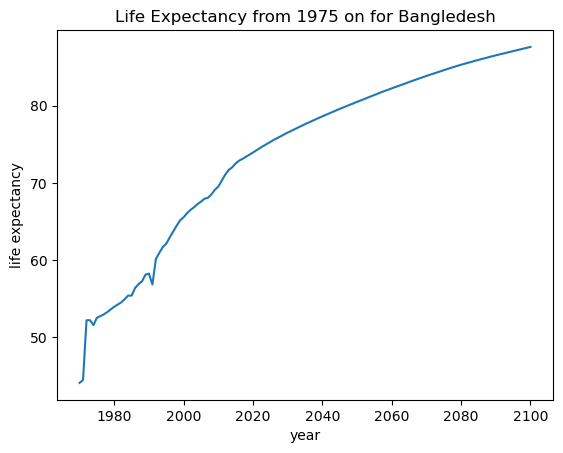

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Filters the years data at index 1 in life_expectancy.csv
years = df_life_expectancy[(df_life_expectancy['time'] >= 1970) & (df_life_expectancy['geo'] == "bgd")].iloc[:, 1]
# Filters the life expectancy data at index 2 in life_expectancy.csv
age = df_life_expectancy[(df_life_expectancy['time'] >= 1970) & (df_life_expectancy['geo'] == "bgd")].iloc[:, 2]

# Converts the year data to a list
years_list = list(years)

# Converts the age data to a list
age_list = list(age)

# assigns the x values
x = np.array(years_list)
# assigns the y values
y = np.array(age_list)

# creates the line plot
plt.plot(x, y)

# makes the labels and title
plt.xlabel("year")
plt.ylabel("life expectancy")
plt.title("Life Expectancy from 1975 on for Bangledesh")

plt.show()

Assuming everything else stays the same, do the trends in life expectancy in the graph above directly explain why the population growth rate decreased from 1985 to 2015 in Bangladesh? Why or why not? 

__Hint__: What happened in Bangladesh in 1991, and does that event explain the overall change in population growth rate? This [webpage](https://en.wikipedia.org/wiki/1991_Bangladesh_cyclone) provides relevant context.


_Type your answer here, replacing this text._

# Delete this content 

No, the trends in life expectancy do not directly explain the decrease in population growth rate from 1985 to 2015 in Bangladesh. Here's why:

The life expectancy graph shows a steady increase over this period, from approximately 55 years in 1985 to about 70 years in 2015.

If life expectancy was the direct cause, we would expect the opposite effect:

Increasing life expectancy means people are living longer
More people living longer would typically contribute to population growth, not decrease it
This would lead to a higher, not lower, population growth rate
The 1991 Bangladesh cyclone, while a devastating event that killed over 138,000 people, was a one-time event and cannot explain the sustained decrease in population growth rate over a 30-year period.

The decrease in population growth rate is more likely explained by other factors not shown in the life expectancy graph, such as:

Changes in fertility rates
Family planning programs
Socioeconomic development
Educational opportunities, especially for women
Urbanization
In fact, improving life expectancy alongside decreasing population growth is often a sign of development, where better healthcare and living conditions coincide with lower birth rates due to socioeconomic changes.

The `fertility` table contains a statistic that is often used to measure how many babies are being born, the *total fertility rate*. This number describes the [number of children a woman would have in her lifetime](https://www.measureevaluation.org/prh/rh_indicators/specific/fertility/total-fertility-rate), on average, if the current rates of birth by age of the mother persisted throughout her child bearing years, assuming she survived through age 49. 

In the code cell below complete the function `fertility_over_time`. It takes the Alpha-3 code of a country as `country_code` and a `start` year. In the body of `fertility_over_time`, 

* Create a filter for the years data at index 1 in fertility.csv (See the previous code cell for an example)
* Create a filter for the children_per_woman at index 2 in fertility.csv (See the previous code cell for an example)
* Convert each of the filters above to a list
* Assign the years to the x values (See the previous code cell for an example)
* Assing the children_per_woman to the y values (See the previous code cell for an example)
* Create a plot (See the previous code cell for an example)
* Create the appropriate labels (See the previous code cell for an example)

The code for Bangladesh and the year 1970 are used in the call to your `fertility_over_time` function in order to plot how Bangladesh's fertility rate has changed since 1970. 

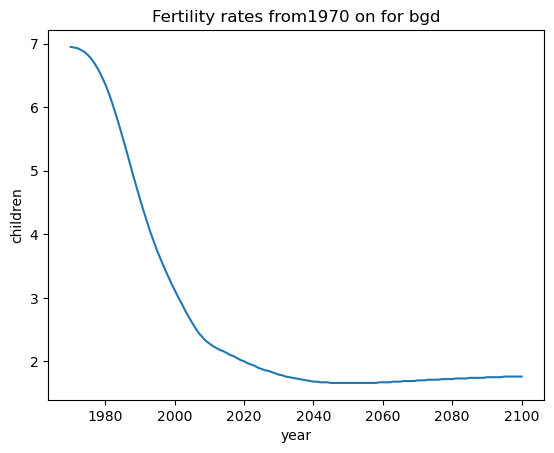

In [ ]:
def fertility_over_time(country_code, start):
    years = df_fertility[(df_fertility['time'] >= start) & (df_fertility['geo'] == country_code)].iloc[:, 1]
    children = df_fertility[(df_fertility['time'] >= start) & (df_fertility['geo'] == country_code)].iloc[:, 2]
    years_list = list(years)
    children_list = list(children)
    # assigns the x values
    x = np.array(years_list)
    # assigns the y values
    y = np.array(children_list)
    # creates the line plot
    plt.plot(x, y)
    # makes the labels and title
    plt.xlabel("year")
    plt.ylabel("children")
    plt.title("Fertility rates from" + str(start) + " on for " + country_code)

# Do not edit the lines below
bangladesh_code = "bgd"
fertility_over_time(bangladesh_code, 1970)

Assuming everything else is constant, do the trends in fertility in the graph above help directly explain why the population growth rate decreased from 1980 to 2020 in Bangladesh? Why or why not?

_Type your answer here, replacing this text._

It has been [observed](https://www.ageing.ox.ac.uk/download/143) that lower fertility rates are often associated with lower child mortality rates. The link has been attributed to family planning: if parents can expect that their children will all survive into adulthood, then they will choose to have fewer children. In the reverse direction, having fewer children may allow families to devote more resources to each child, reducing child mortality. We can see if this association is evident in Bangladesh by plotting the relationship between total fertility rate and [child mortality rate per 1000 children](https://en.wikipedia.org/wiki/Child_mortality).

The code cell below creates a scatter plot that shows Bangladesh's total fertility on the horizontal axis and its child mortality on the vertical axis with one point for each year.

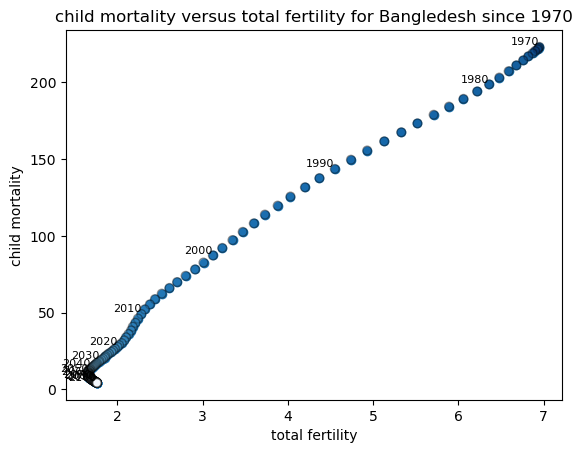

In [93]:
from matplotlib.cm import ScalarMappable

mortality = df_child_mortality[(df_child_mortality['time'] >= 1970) & (df_child_mortality['geo'] == "bgd")].iloc[:, 2]
children = df_fertility[(df_fertility['time'] >= 1970) & (df_fertility['geo'] == "bgd")].iloc[:, 2]
years = df_fertility[(df_fertility['time'] >= 1970) & (df_fertility['geo'] == "bgd")].iloc[:, 1]
mortality_list = list(mortality)
children_list = list(children)
years_list = list(years)

x_values = children_list
y_values = mortality_list
point_labels = years_list

plt.scatter(x_values, y_values)
plt.xlabel("total fertility")
plt.ylabel("child mortality")
plt.title("child mortality versus total fertility for Bangledesh since 1970")

for i, (x, y, year) in enumerate(zip(x_values, y_values, point_labels)):
    if i % 10 == 0:  # label every 10 years for readability
        plt.text(x, y, str(year), fontsize=8, ha='right', va='bottom', color='black')

sc = plt.scatter(x_values, y_values, c=point_labels, cmap=cmap, norm=norm, s=40, edgecolor='k', alpha=0.4)
plt.show()

In one or two sentences, describe the association (if any) that is illustrated by this scatter diagram. Does the diagram show that reduced child mortality *causes* parents to choose to have fewer children?

_Type your answer here, replacing this text._